In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Retirando valores nulos


In [4]:
df = pd.read_csv('Consumo_cerveja.csv')
df.isna()

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
936,True,True,True,True,True,True,True
937,True,True,True,True,True,True,True
938,True,True,True,True,True,True,True
939,True,True,True,True,True,True,True


In [5]:
df = df.dropna(how='all')
df.isna().sum()

Data                           0
Temperatura Media (C)          0
Temperatura Minima (C)         0
Temperatura Maxima (C)         0
Precipitacao (mm)              0
Final de Semana                0
Consumo de cerveja (litros)    0
dtype: int64

# Deixando as Colunas de interesse

In [6]:
data = df.drop(['Data', 'Temperatura Minima (C)','Temperatura Maxima (C)','Precipitacao (mm)'], axis=1)
data

,Temperatura Media (C),Final de Semana,Consumo de cerveja (litros)
0,"27,3",0.0,25.461
1,"27,02",0.0,28.972
2,"24,82",1.0,30.814
3,"23,98",1.0,29.799
4,"23,82",0.0,28.900
...,...,...,...
360,24,1.0,32.307
361,"22,64",0.0,26.095
362,"21,68",0.0,22.309
363,"21,38",0.0,20.467


## Transformando "," em "." para o tipo de data ser float

In [7]:
data['Temperatura Media (C)'] = data['Temperatura Media (C)'].str.replace(',', '.')
data.head()

,Temperatura Media (C),Final de Semana,Consumo de cerveja (litros)
0,27.3,0.0,25.461
1,27.02,0.0,28.972
2,24.82,1.0,30.814
3,23.98,1.0,29.799
4,23.82,0.0,28.900


## Transformando os dias da semana em numeros de 1-7

In [8]:
lista = data['Final de Semana']
lista = lista.astype(int)

In [16]:
def Transforma(lista):
    x = 0
    while x <= 364:
        if lista[x] == 1:
            if lista[x+1] == 0:
                lista[x+1] = 2
            else:
                pass
        else:
            pass
        x+=1  
    x = 0
    while x <= 364:
        if lista[x] == 2:
            if lista[x+1] == 0:
                lista[x+1] = 3
            else:
                pass
        else:
            pass
        x+=1 
    x = 0
    while x <= 364:
        if lista[x] == 3:
            if lista[x+1] == 0:
                lista[x+1] = 4
            else:
                pass
        else:
            pass
        x+=1 
    x = 0
    while x <= 364:
        if lista[x] == 4:
            if lista[x+1] == 0:
                lista[x+1] = 5
            else:
                pass
        else:
            pass
        x+=1 
    x = 0
    while x <= 364:
        if lista[x] == 1:
            if lista[x+1] == 1:
                lista[x] = 7
            else:
                pass
        else:
            pass
        x+=1 
    x = 0
    while x <= 364:
        if lista[x] == 7:
            if lista[x-1] == 0:
                lista[x-1] = 6
            else:
                pass
        else:
            pass
        x+=1
    return 

In [17]:
Transforma(lista)

In [18]:
lista[0] , lista[1] = 5, 6
data['Final de Semana'] = pd.DataFrame(lista)
data['Final de Semana']

0      5
1      6
2      7
3      1
4      2
      ..
360    1
361    2
362    3
363    4
364    5
Name: Final de Semana, Length: 365, dtype: int32

In [19]:
data['Final de Semana'] = data['Final de Semana'].astype(float)

In [20]:
data.head()

,Temperatura Media (C),Final de Semana,Consumo de cerveja (litros)
0,27.3,5.0,25.461
1,27.02,6.0,28.972
2,24.82,7.0,30.814
3,23.98,1.0,29.799
4,23.82,2.0,28.900


# Normalizando dados

In [21]:
from sklearn.preprocessing import MinMaxScaler
obj_norm = MinMaxScaler().fit(data)
df_final = obj_norm.transform(data)
df_final = pd.DataFrame(df_final)
df_final.describe()

,0,1,2
count,365.000000,365.000000,365.000000
mean,0.521702,0.500457,0.468694
std,0.199255,0.333447,0.186452
min,0.000000,0.000000,0.000000
25%,0.383459,0.166667,0.324871
50%,0.531328,0.500000,0.446046
75%,0.650376,0.833333,0.605578
max,1.000000,1.000000,1.000000


## Analisando graficamente os dados

<BarContainer object of 365 artists>

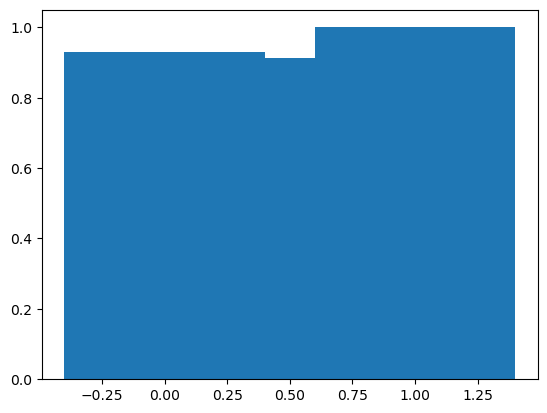

In [24]:
x = df_final[1]
y = df_final[2]
plt.bar(x,y)

<BarContainer object of 365 artists>

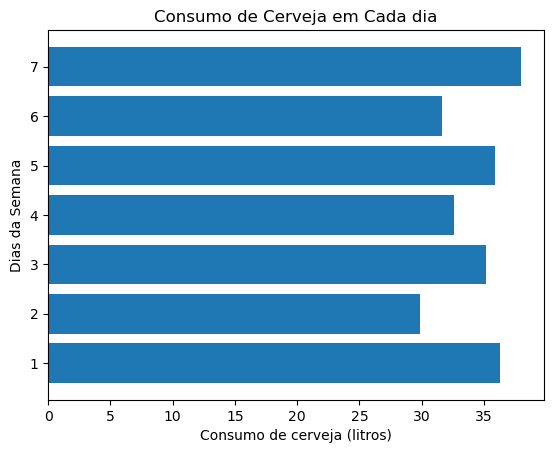

In [28]:
x = data['Final de Semana']
y = data['Consumo de cerveja (litros)']
plt.title("Consumo de Cerveja em Cada dia")
plt.xlabel("Consumo de cerveja (litros)")
plt.ylabel("Dias da Semana")
plt.barh(x,y)

In [31]:
x = data[['Temperatura Media (C)'] >'25']
y = data['Consumo de cerveja (litros)']
plt.title("Consumo de Cerveja baseado na temperatura")
plt.xlabel("Consumo de cerveja (litros)")
plt.ylabel("Temperatura Media (C)")
plt.barh(x,y)

TypeError: '>' not supported between instances of 'list' and 'str'

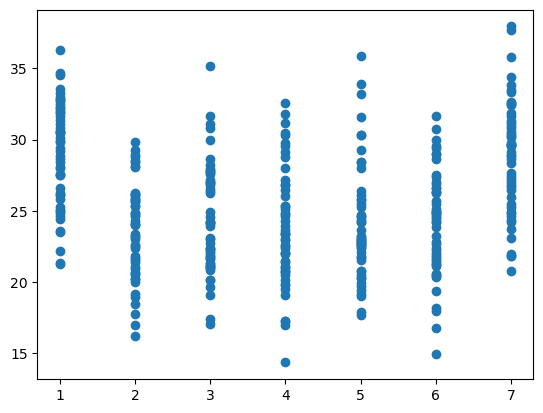

In [23]:
x = data['Final de Semana']
y = data['Consumo de cerveja (litros)']
plt.scatter(x,y)

# Dividindo entre variaveis de teste e de treino

In [ ]:
dt_var = df_final[df_final.columns[0:-1]]
dt_res = df_final[df_final.columns[-1:]]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(dt_var, dt_res, test_size= 0.3)